In [103]:
!pip install pycaret &> /dev/null

In [104]:
from pycaret.utils import version

In [105]:
import pandas as pd

In [106]:
data=pd.read_csv("/content/Fuel_cell_performance_data-Full.csv")

# Roll No.-102203820
# Target: Target1

In [107]:
target_column="Target1"
data = data.drop(columns=[col for col in data.columns if col.startswith("Target") and col != target_column])

In [108]:
data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Target1
0,52.9,1.33,49.1,37.13,129.43,35.0,0.281,112.7,207,0.55,98.971,2.87,1362,15.9,429,0.959
1,87.6,2.12,48.8,42.10,171.07,37.6,0.153,157.4,188,0.86,101.179,2.34,5130,26.1,1819,0.728
2,73.3,2.72,93.8,20.11,163.69,44.3,0.367,348.7,270,1.87,98.919,2.13,7811,16.7,1763,0.784
3,65.6,2.58,48.1,35.11,63.37,32.5,0.279,321.2,322,1.75,101.560,2.91,1641,32.1,203,0.884
4,39.6,2.58,49.3,32.93,63.40,47.0,0.149,205.6,203,1.55,98.148,1.93,7648,27.5,276,0.736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,35.7,2.35,90.8,27.08,187.90,42.7,0.274,185.1,299,1.47,102.654,2.29,6588,34.2,1484,0.926
996,83.2,2.92,41.0,24.22,60.14,38.2,0.300,157.5,97,1.17,99.714,2.30,4431,21.8,1045,0.724
997,37.3,1.16,51.9,25.37,92.78,43.3,0.385,237.6,166,0.72,100.844,2.07,916,21.2,1311,0.876
998,87.8,1.15,50.8,30.04,168.43,35.8,0.205,382.3,276,1.22,100.460,1.95,8917,19.8,1971,0.752


# **MODEL COMPARISON**

In [109]:
from pycaret.regression import *
s = setup(data = data, target=target_column,train_size = 0.7,data_split_shuffle = False, verbose=False)


In [110]:
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.0501,0.0035,0.0591,0.1579,0.0323,0.0606,0.0240
ridge,Ridge Regression,0.0500,0.0035,0.0591,0.1570,0.0323,0.0605,0.0250
lr,Linear Regression,0.0500,0.0035,0.0591,0.1564,0.0323,0.0605,0.7980
lar,Least Angle Regression,0.0500,0.0035,0.0592,0.1561,0.0323,0.0605,0.0260
ada,AdaBoost Regressor,0.0510,0.0036,0.0602,0.1256,0.0328,0.0616,0.4620
rf,Random Forest Regressor,0.0517,0.0038,0.0611,0.0997,0.0333,0.0625,1.0340
et,Extra Trees Regressor,0.0522,0.0038,0.0614,0.0929,0.0335,0.0631,0.5850
lasso,Lasso Regression,0.0524,0.0039,0.0622,0.0713,0.0340,0.0634,0.0510
omp,Orthogonal Matching Pursuit,0.0524,0.0039,0.0622,0.0713,0.0340,0.0634,0.0250
llar,Lasso Least Angle Regression,0.0524,0.0039,0.0622,0.0713,0.0340,0.0634,0.0290


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

# **Data Preprocessing**

# 1.Feature Selection

In [111]:
setup(data =data, target = target_column, train_size = 0.7,
      feature_selection = True, feature_selection_method = 'univariate',
      n_features_to_select = 0.2, data_split_shuffle = False, verbose=False)
cm = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.0502,0.0035,0.0590,0.1619,0.0322,0.0607,0.0320
ridge,Ridge Regression,0.0502,0.0035,0.0590,0.1618,0.0322,0.0607,0.0310
lar,Least Angle Regression,0.0502,0.0035,0.0590,0.1618,0.0322,0.0607,0.0280
lr,Linear Regression,0.0502,0.0035,0.0590,0.1618,0.0322,0.0607,0.0330
huber,Huber Regressor,0.0501,0.0035,0.0591,0.1602,0.0323,0.0607,0.0530
ada,AdaBoost Regressor,0.0509,0.0036,0.0602,0.1278,0.0328,0.0615,0.1690
en,Elastic Net,0.0524,0.0039,0.0622,0.0714,0.0340,0.0634,0.0290
llar,Lasso Least Angle Regression,0.0524,0.0039,0.0622,0.0714,0.0340,0.0634,0.0350
lasso,Lasso Regression,0.0524,0.0039,0.0622,0.0714,0.0340,0.0634,0.0320
omp,Orthogonal Matching Pursuit,0.0524,0.0039,0.0622,0.0713,0.0340,0.0634,0.0320


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

# 2.Outlier Removal

In [112]:
setup(data =data, target = target_column, train_size = 0.7,
      remove_outliers = True, outliers_method = "lof", outliers_threshold = 0.05,
      data_split_shuffle = False, verbose=False)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.0500,0.0035,0.0591,0.1599,0.0323,0.0605,0.0520
ridge,Ridge Regression,0.0499,0.0035,0.0591,0.1580,0.0322,0.0604,0.0530
lr,Linear Regression,0.0500,0.0035,0.0591,0.1571,0.0323,0.0604,0.0320
lar,Least Angle Regression,0.0500,0.0035,0.0592,0.1556,0.0323,0.0604,0.0580
ada,AdaBoost Regressor,0.0512,0.0037,0.0604,0.1197,0.0330,0.0618,0.1810
et,Extra Trees Regressor,0.0518,0.0037,0.0611,0.1017,0.0333,0.0626,0.5930
rf,Random Forest Regressor,0.0515,0.0038,0.0613,0.0956,0.0334,0.0623,0.6640
gbr,Gradient Boosting Regressor,0.0523,0.0039,0.0621,0.0729,0.0338,0.0631,0.2990
omp,Orthogonal Matching Pursuit,0.0524,0.0039,0.0622,0.0721,0.0340,0.0634,0.0620
lasso,Lasso Regression,0.0524,0.0039,0.0622,0.0721,0.0340,0.0633,0.0330


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

# 3.Normalisation

In [113]:
setup(data = data, target = target_column, train_size = 0.7,
      normalize = True, normalize_method = 'zscore', data_split_shuffle = False, verbose=False)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.0500,0.0035,0.0591,0.1595,0.0322,0.0605,0.0460
ridge,Ridge Regression,0.0500,0.0035,0.0591,0.1565,0.0323,0.0605,0.0300
lr,Linear Regression,0.0500,0.0035,0.0591,0.1564,0.0323,0.0605,0.0340
lar,Least Angle Regression,0.0500,0.0035,0.0591,0.1564,0.0323,0.0605,0.0320
huber,Huber Regressor,0.0502,0.0036,0.0595,0.1467,0.0325,0.0608,0.0540
ada,AdaBoost Regressor,0.0507,0.0036,0.0601,0.1298,0.0328,0.0611,0.3440
par,Passive Aggressive Regressor,0.0508,0.0036,0.0601,0.1278,0.0328,0.0614,0.0510
et,Extra Trees Regressor,0.0514,0.0037,0.0608,0.1111,0.0331,0.0621,0.4330
rf,Random Forest Regressor,0.0513,0.0037,0.0610,0.1034,0.0333,0.0620,0.6930
gbr,Gradient Boosting Regressor,0.0521,0.0039,0.0620,0.0747,0.0338,0.0628,0.3580


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

# 4.Transformation

In [114]:
setup(data = data, target = target_column,train_size=0.7,
      transformation = True, transformation_method = 'yeo-johnson',
      data_split_shuffle = False, verbose=False)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.0500,0.0035,0.0592,0.1578,0.0323,0.0605,0.1150
ridge,Ridge Regression,0.0500,0.0035,0.0591,0.1574,0.0323,0.0604,0.0710
lr,Linear Regression,0.0500,0.0035,0.0591,0.1567,0.0323,0.0604,0.0730
lar,Least Angle Regression,0.0500,0.0035,0.0591,0.1564,0.0323,0.0604,0.0720
ada,AdaBoost Regressor,0.0512,0.0037,0.0607,0.1116,0.0331,0.0619,0.2220
et,Extra Trees Regressor,0.0516,0.0037,0.0609,0.1095,0.0332,0.0624,0.5770
rf,Random Forest Regressor,0.0515,0.0038,0.0611,0.1017,0.0333,0.0622,0.7710
gbr,Gradient Boosting Regressor,0.0521,0.0039,0.0621,0.0725,0.0338,0.0629,0.3450
en,Elastic Net,0.0524,0.0039,0.0624,0.0670,0.0341,0.0634,0.0720
lasso,Lasso Regression,0.0524,0.0039,0.0624,0.0662,0.0341,0.0634,0.0700


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

# 5. PCA

In [115]:
setup(data = data, target = target_column, train_size = 0.7,
      pca = True, pca_method = 'incremental', data_split_shuffle = False, verbose=False)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.0501,0.0035,0.0591,0.1579,0.0323,0.0606,0.0560
ridge,Ridge Regression,0.0500,0.0035,0.0591,0.1570,0.0323,0.0605,0.0360
lr,Linear Regression,0.0500,0.0035,0.0591,0.1564,0.0323,0.0605,0.0400
lar,Least Angle Regression,0.0500,0.0035,0.0591,0.1564,0.0323,0.0605,0.0380
ada,AdaBoost Regressor,0.0509,0.0036,0.0603,0.1252,0.0329,0.0614,0.2060
et,Extra Trees Regressor,0.0518,0.0038,0.0613,0.0977,0.0334,0.0626,0.6760
rf,Random Forest Regressor,0.0518,0.0038,0.0614,0.0945,0.0335,0.0626,0.7350
lasso,Lasso Regression,0.0524,0.0039,0.0622,0.0713,0.0340,0.0634,0.0340
omp,Orthogonal Matching Pursuit,0.0524,0.0039,0.0622,0.0713,0.0340,0.0634,0.0630
llar,Lasso Least Angle Regression,0.0524,0.0039,0.0622,0.0713,0.0340,0.0634,0.0610


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

# Model performance using "Feature Selection"+ "Outlier Removal" + "Normalization" + "Transformation"

In [116]:
setup(data = data, target = target_column, train_size = 0.7,
      feature_selection = True, feature_selection_method = 'univariate',
      remove_outliers = True, outliers_threshold = 0.05,
      normalize = True, normalize_method = 'zscore',
      transformation = True, transformation_method = 'yeo-johnson',
      data_split_shuffle = False, verbose=False)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.0501,0.0035,0.0590,0.1623,0.0322,0.0606,0.3900
lr,Linear Regression,0.0501,0.0035,0.0590,0.1621,0.0322,0.0606,0.2790
ridge,Ridge Regression,0.0501,0.0035,0.0590,0.1621,0.0322,0.0606,0.4840
lar,Least Angle Regression,0.0501,0.0035,0.0590,0.1621,0.0322,0.0606,0.4850
huber,Huber Regressor,0.0501,0.0035,0.0591,0.1603,0.0323,0.0607,0.3240
ada,AdaBoost Regressor,0.0510,0.0036,0.0600,0.1330,0.0327,0.0617,0.2900
omp,Orthogonal Matching Pursuit,0.0524,0.0039,0.0623,0.0686,0.0340,0.0634,0.3640
gbr,Gradient Boosting Regressor,0.0534,0.0041,0.0635,0.0307,0.0346,0.0645,0.4030
par,Passive Aggressive Regressor,0.0533,0.0040,0.0632,0.0279,0.0345,0.0641,0.4350
rf,Random Forest Regressor,0.0537,0.0042,0.0642,0.0064,0.0350,0.0648,0.7350


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

# **MODEL BUILDING**

# 1. BAYSIAN RIDGE

In [154]:
Model = create_model('br',verbose=False)

In [148]:
newdata=data.iloc[:20]

In [155]:
predictions=predict_model(Model,data=newdata)
predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.0550,0.0042,0.0647,0.0806,0.0350,0.0645


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Target1,prediction_label
0,52.900002,1.33,49.099998,37.130001,129.429993,35.000000,0.281,112.699997,207,0.55,98.971001,2.87,1362,15.900000,429,0.959,0.865240
1,87.599998,2.12,48.799999,42.099998,171.070007,37.599998,0.153,157.399994,188,0.86,101.179001,2.34,5130,26.100000,1819,0.728,0.804086
2,73.300003,2.72,93.800003,20.110001,163.690002,44.299999,0.367,348.700012,270,1.87,98.918999,2.13,7811,16.700001,1763,0.784,0.822553
3,65.599998,2.58,48.099998,35.110001,63.369999,32.500000,0.279,321.200012,322,1.75,101.559998,2.91,1641,32.099998,203,0.884,0.849898
4,39.599998,2.58,49.299999,32.930000,63.400002,47.000000,0.149,205.600006,203,1.55,98.148003,1.93,7648,27.500000,276,0.736,0.833691
5,39.000000,2.29,84.800003,41.490002,83.800003,27.400000,0.393,215.600006,298,1.56,99.306000,1.71,7740,18.200001,1718,0.898,0.852338
6,32.799999,2.40,62.000000,45.580002,98.889999,43.599998,0.250,261.600006,328,1.65,98.865997,2.94,587,15.400000,797,0.948,0.901717
7,81.699997,2.71,81.000000,10.670000,103.169998,46.500000,0.121,99.099998,353,1.92,97.875999,1.91,185,15.900000,338,0.869,0.868603
8,66.300003,1.50,34.500000,37.770000,146.000000,29.900000,0.285,171.699997,325,1.75,95.707001,2.84,9659,25.100000,1001,0.816,0.786363
9,69.400002,1.97,63.900002,11.970000,51.150002,35.599998,0.179,165.699997,51,1.43,100.780998,1.78,2002,29.500000,832,0.838,0.851816


# PLOTS

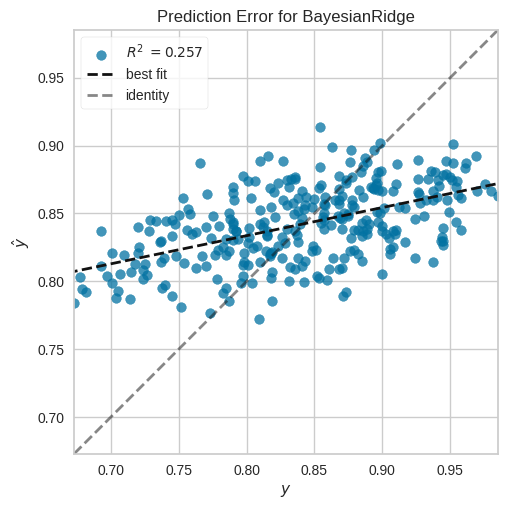

In [156]:
plot_model(Model,"error")

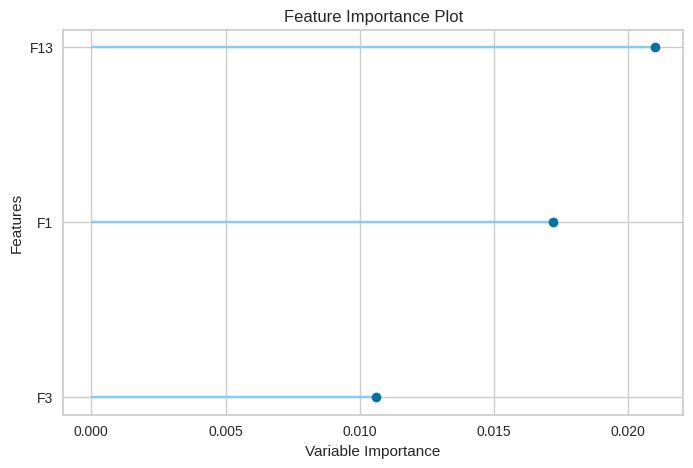

In [157]:
plot_model(Model,"feature")

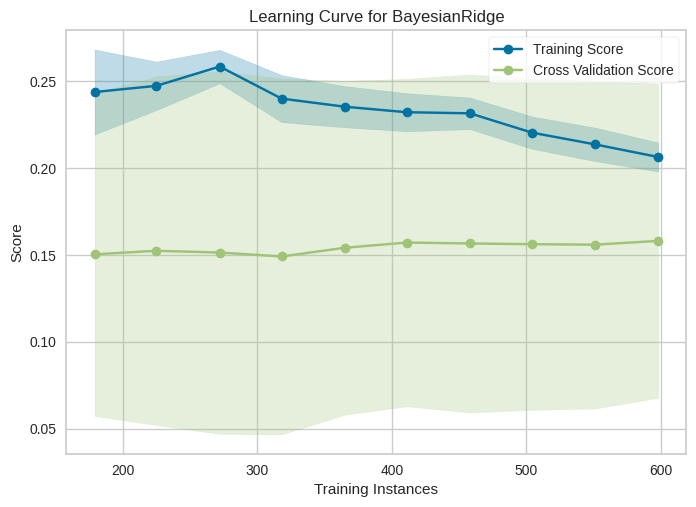

In [158]:
plot_model(Model,"learning")

In [159]:
plot_model(Model, plot='parameter')

,Parameters
alpha_1,1e-06
alpha_2,1e-06
alpha_init,None
compute_score,False
copy_X,True
fit_intercept,True
lambda_1,1e-06
lambda_2,1e-06
lambda_init,None
max_iter,None


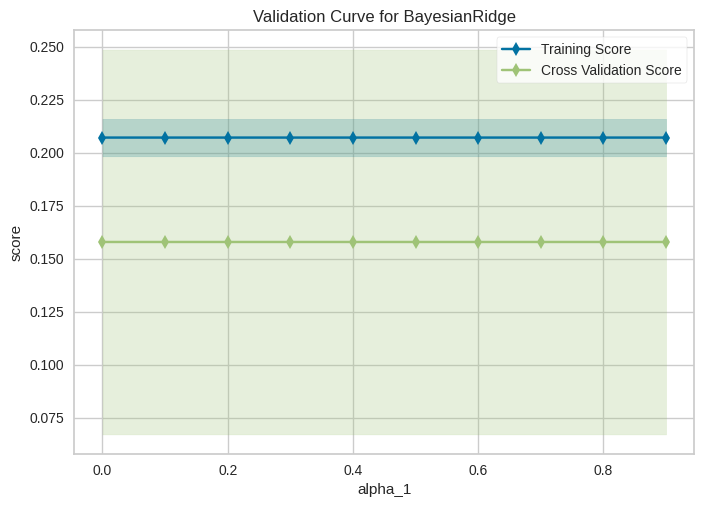

In [160]:
plot_model(Model, plot='vc')

# 2.AdaBoost Regressor

In [171]:
model1=create_model('ada',verbose=False)

In [164]:
newdata=data.iloc[:20]

In [172]:
prediction=predict_model(Model,data=newdata)
prediction

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.0550,0.0042,0.0647,0.0806,0.0350,0.0645


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Target1,prediction_label
0,52.900002,1.33,49.099998,37.130001,129.429993,35.000000,0.281,112.699997,207,0.55,98.971001,2.87,1362,15.900000,429,0.959,0.865240
1,87.599998,2.12,48.799999,42.099998,171.070007,37.599998,0.153,157.399994,188,0.86,101.179001,2.34,5130,26.100000,1819,0.728,0.804086
2,73.300003,2.72,93.800003,20.110001,163.690002,44.299999,0.367,348.700012,270,1.87,98.918999,2.13,7811,16.700001,1763,0.784,0.822553
3,65.599998,2.58,48.099998,35.110001,63.369999,32.500000,0.279,321.200012,322,1.75,101.559998,2.91,1641,32.099998,203,0.884,0.849898
4,39.599998,2.58,49.299999,32.930000,63.400002,47.000000,0.149,205.600006,203,1.55,98.148003,1.93,7648,27.500000,276,0.736,0.833691
5,39.000000,2.29,84.800003,41.490002,83.800003,27.400000,0.393,215.600006,298,1.56,99.306000,1.71,7740,18.200001,1718,0.898,0.852338
6,32.799999,2.40,62.000000,45.580002,98.889999,43.599998,0.250,261.600006,328,1.65,98.865997,2.94,587,15.400000,797,0.948,0.901717
7,81.699997,2.71,81.000000,10.670000,103.169998,46.500000,0.121,99.099998,353,1.92,97.875999,1.91,185,15.900000,338,0.869,0.868603
8,66.300003,1.50,34.500000,37.770000,146.000000,29.900000,0.285,171.699997,325,1.75,95.707001,2.84,9659,25.100000,1001,0.816,0.786363
9,69.400002,1.97,63.900002,11.970000,51.150002,35.599998,0.179,165.699997,51,1.43,100.780998,1.78,2002,29.500000,832,0.838,0.851816


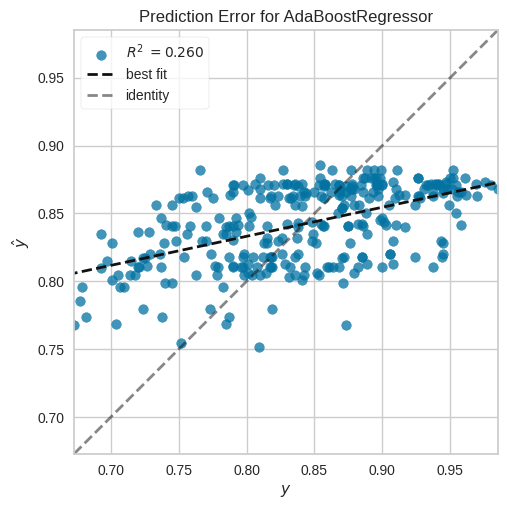

In [173]:
plot_model(model1,"error")

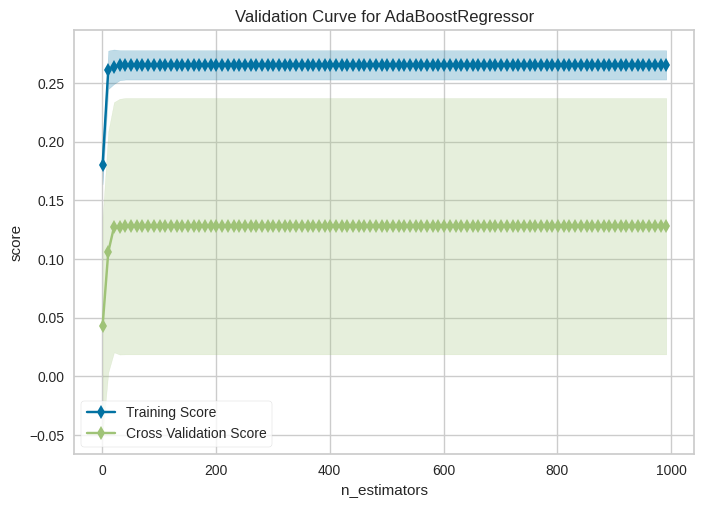

In [174]:
plot_model(model1,"vc")

# 3.Least Angle Regression

In [176]:
model2=create_model("lar")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0519,0.0038,0.0616,0.1668,0.0339,0.0643
1,0.0477,0.0032,0.0566,0.2205,0.0311,0.0588
2,0.0493,0.0033,0.0574,0.2029,0.0311,0.0577
3,0.0463,0.0032,0.0564,0.2559,0.0309,0.0573
4,0.0587,0.0045,0.0674,0.2374,0.0367,0.0705
5,0.0467,0.0031,0.0554,0.0200,0.0302,0.0560
6,0.0494,0.0033,0.0577,0.2265,0.0313,0.0587
7,0.0538,0.0041,0.0638,0.1270,0.0353,0.0680
8,0.0506,0.0035,0.0593,0.0206,0.0320,0.0592


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

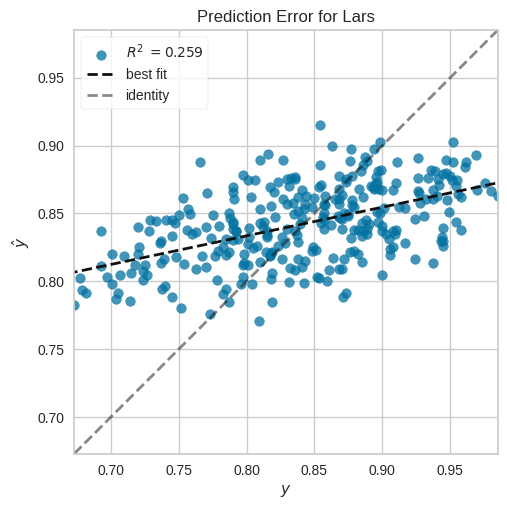

In [177]:
plot_model(model2,"error")

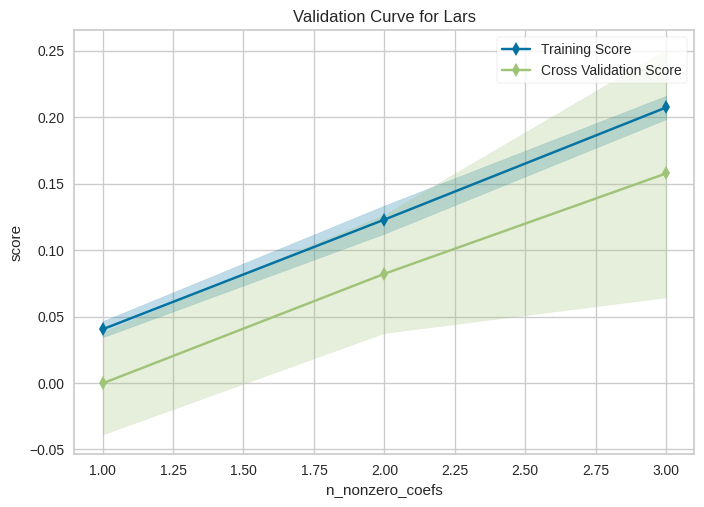

In [178]:
plot_model(model2,"vc")